### Hours Vs Marks

In [64]:
import numpy as np
from matplotlib import pyplot as plt

#### Load DataSet

In [65]:
# Features: [Hours of Study, Hours of Sleep]
X = np.array([
    [2, 8],
    [3, 7],
    [4, 6],
    [5, 5],
    [6, 4],
    [7, 3],
    [8, 2],
    [9, 1]
])

# Target: Final exam score out of 100
y = np.array([50, 55, 60, 65, 70, 75, 80, 85])


#### Predict Model

In [66]:
def make_prediction(x, w, b):
    return np.dot(x, w) + b

#### Square Error Function

In [67]:
def cost_error(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

#### Compute Gradient Decent

In [68]:
def compute_gradient_descent(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x,w,b)
    error = prediction - y
    dj_dw = (1/m) * (x.T @ error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw,dj_db

#### Gradient Decent

In [69]:
def gradient_descent(x, y, w_init, b_init, iter, alpha):
    w = w_init.copy()
    b = b_init
    cost_hist = []

    for i in range(iter):
        dj_dw,dj_db = compute_gradient_descent(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == iter-1:
            cost = cost_error(x, y, w, b)
            cost_hist.append(cost)
            print(f"iterations {i} : cost = {cost:.4f}, w = {w}, b = {b:.4f}")

    return w, b, cost_hist



#### Testing the model

In [ ]:
# Features: [Hours of Study, Hours of Sleep]
X = np.array([
    [2, 8],
    [3, 7],
    [4, 6],
    [5, 5],
    [6, 4],
    [7, 3],
    [8, 2],
    [9, 1]
])

# Target: Final exam score out of 100
y = np.array([50, 55, 60, 65, 70, 75, 80, 85])

mu = np.mean(X, axis=0)
sigma = np.std(X, axis = 0)
X_scaled = (X - mu) / sigma

w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 1e-7
iter = 1000

w_final,b_final, cost_hist = gradient_descent(X_scaled, y, w_init, b_init, iter, alpha)

predictions = make_prediction(X_scaled, w_final, b_final)



iterations 0 : cost = 2343.7495, w = [ 1.14564392e-06 -1.14564392e-06], b = 0.0000
iterations 100 : cost = 2343.7013, w = [ 0.00011571 -0.00011571], b = 0.0007
iterations 200 : cost = 2343.6531, w = [ 0.00023027 -0.00023027], b = 0.0014
iterations 300 : cost = 2343.6050, w = [ 0.00034483 -0.00034483], b = 0.0020
iterations 400 : cost = 2343.5568, w = [ 0.00045938 -0.00045938], b = 0.0027
iterations 500 : cost = 2343.5086, w = [ 0.00057394 -0.00057394], b = 0.0034
iterations 600 : cost = 2343.4604, w = [ 0.00068849 -0.00068849], b = 0.0041
iterations 700 : cost = 2343.4122, w = [ 0.00080304 -0.00080304], b = 0.0047
iterations 800 : cost = 2343.3641, w = [ 0.00091759 -0.00091759], b = 0.0054
iterations 900 : cost = 2343.3159, w = [ 0.00103213 -0.00103213], b = 0.0061
iterations 999 : cost = 2343.2682, w = [ 0.00114553 -0.00114553], b = 0.0067


array([0.00325001, 0.00424991, 0.00524981, 0.00624971, 0.00724961,
       0.00824951, 0.00924941, 0.01024931])

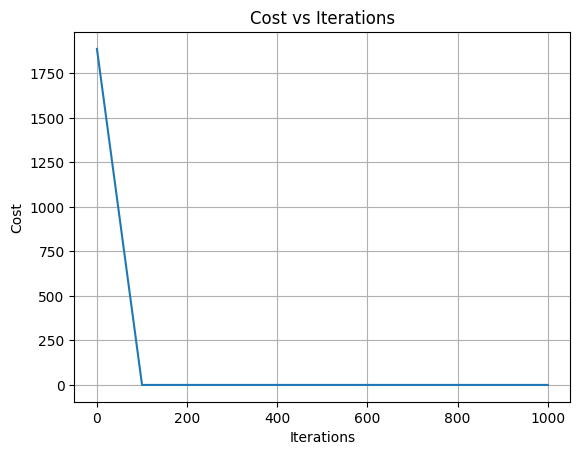

In [73]:
plt.plot(range(0, len(cost_hist) * 100, 100), cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.show()

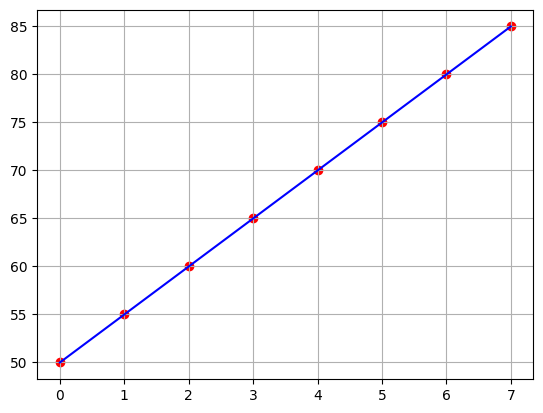

In [78]:
plt.scatter(range(len(y)), y, c='red', label='Actual')
plt.plot(range(len(predictions)), predictions, c='blue', label='predictions')
plt.grid(True)